INFO:root:Retrieving audio from https://www.youtube.com/watch?v=f33sC1x18Vk
INFO:root:Detecting beats
INFO:root:Extracting feats
INFO:root:Transcribing
INFO:root:Formatting output


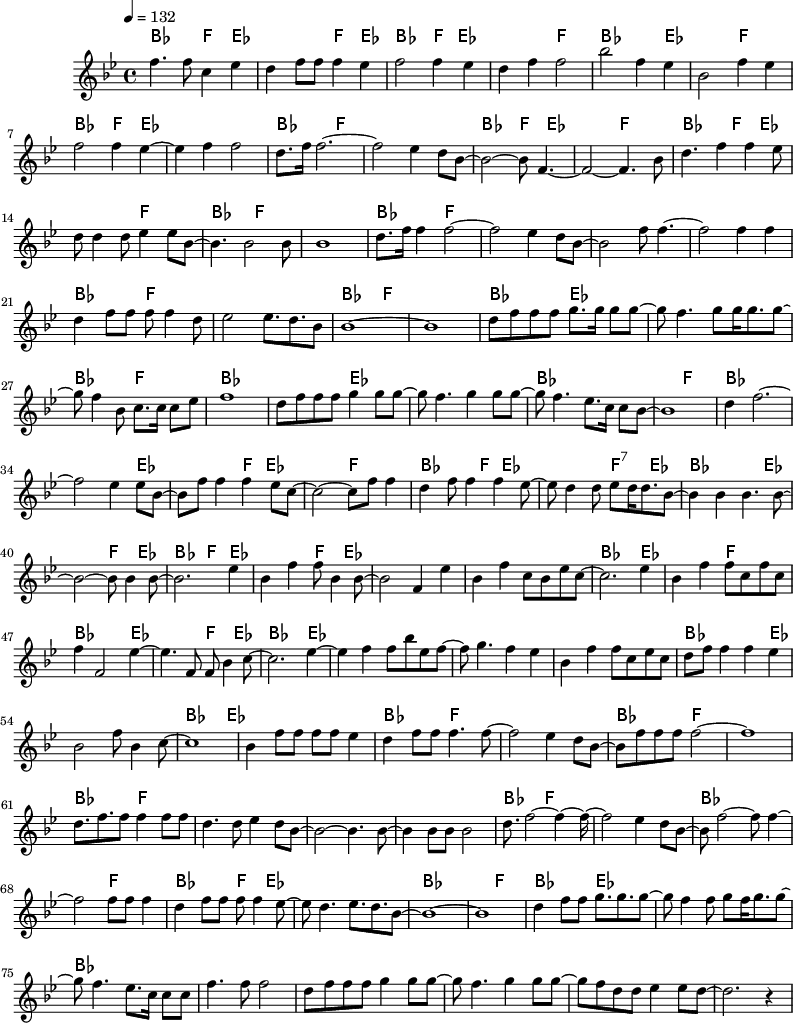

In [7]:
import logging

from IPython.display import display, Image

from sheetsage.infer import sheetsage
from sheetsage.utils import engrave

logging.basicConfig(level=logging.INFO)
lead_sheet, segment_beats, segment_beats_times = sheetsage(
    'https://www.youtube.com/watch?v=f33sC1x18Vk',
    segment_start_hint=None)

lead_sheet_png = engrave(lead_sheet.as_lily())
display(Image(lead_sheet_png))

In [ ]:
print(lead_sheet.as_lily())

In [ ]:
print(lead_sheet)

In [ ]:
print(_PROBE)

In [ ]:
print(ref_tts)

In [ ]:
import pathlib
import pickle

from sheetsage import CACHE_DIR

with open(pathlib.Path(CACHE_DIR, 'test/end2end/fishin_11_handcrafted', 'audio.pkl'), 'rb') as f:
    sr, audio = pickle.load(f)

In [ ]:
from scipy.io.wavfile import write as wavwrite

wavwrite('/tmp/ugh.wav', sr, audio)

In [ ]:
import numpy as np

with open(pathlib.Path(CACHE_DIR, 'test/end2end/fishin_11_handcrafted', 'beattrack.pkl'), 'rb') as f:
    beats_per_bar, offset, duration, tertiary_times = pickle.load(f)

ref_tts = np.array(tertiary_times)
print(ref_tts[0])

In [ ]:
extractor = _init_extractor(InputFeats.HANDCRAFTED)
offset = ref_tts[0]
fr, feats = extractor('/tmp/ugh.wav', offset=offset, duration=ref_tts[-1] - offset)
beat_resampled = []
chunk_tertiaries = ref_tts
for i in range(chunk_tertiaries.shape[0] - 1):
    s = int((chunk_tertiaries[i] - offset) * fr)
    e = int((chunk_tertiaries[i + 1] - offset) * fr)
    assert e > s
    beat_resampled.append(np.mean(feats[s:e], axis=0, keepdims=True))
beat_resampled = np.concatenate(beat_resampled, axis=0)
print(beat_resampled.shape)

In [ ]:
import pathlib
import pickle
from sheetsage import CACHE_DIR

with open(pathlib.Path(CACHE_DIR, 'test/end2end/fishin_11_handcrafted', 'feats.pkl'), 'rb') as f:
    ref_feats = pickle.load(f)
#my_feats = beat_resampled
my_feats = _PROBE

for i in range(my_feats.shape[0]):
    print(np.abs(ref_feats[i] - my_feats[i]).mean())

In [ ]:
my = _PROBE
#print(ref[:my.shape[0]])
#print(my)
for i in range(my.shape[0]):
    if ref[i] != my[i]:
        print(i, ref[i], my[i])

In [ ]:
from sheetsage.utils import decode_audio

sr, audio = decode_audio(retrieve_asset('TEST_FISHIN'))
print(sr, audio.shape, audio.dtype, audio.min(), audio.max())

In [ ]:
from sheetsage.utils import decode_audio, retrieve_audio_bytes

audio_bytes = retrieve_audio_bytes('https://www.youtube.com/watch?v=fHI8X4OXluQ')
print(len(audio_bytes))